All training data: (60000, 28, 28, 1)
All test data: (10000, 28, 28, 1)
Final training data: (42000, 28, 28, 1)
Validation data: (18000, 28, 28, 1)
Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 128s 3ms/sample - loss: 0.2081 - val_loss: 0.0852
Epoch 2/10
42000/42000 [==============================] - 112s 3ms/sample - loss: 0.0784 - val_loss: 0.0739
Epoch 3/10
42000/42000 [==============================] - 101s 2ms/sample - loss: 0.0720 - val_loss: 0.0706
Epoch 4/10
42000/42000 [==============================] - 102s 2ms/sample - loss: 0.0698 - val_loss: 0.0692
Epoch 5/10
42000/42000 [==============================] - 102s 2ms/sample - loss: 0.0686 - val_loss: 0.0683
Epoch 6/10
42000/42000 [==============================] - 115s 3ms/sample - loss: 0.0678 - val_loss: 0.0675
Epoch 7/10
42000/42000 [==============================] - 114s 3ms/sample - loss: 0.0672 - val_loss: 0.0670
Epoch 8/10
42000/42000 [======================

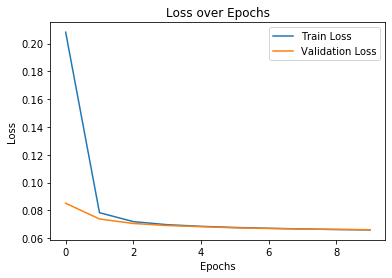

10000/10000 [==============================] - 12s 1ms/sample - loss: 0.06570s - loss: 0.06

🔍 Final Test Loss: 0.0657


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape to (samples, 28, 28, 1) for CNN input
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

print("All training data:", x_train.shape)
print("All test data:", x_test.shape)

# Split 70% for training and 30% for validation from training data
x_train_sub, x_val = train_test_split(x_train, test_size=0.3, random_state=42)

print("Final training data:", x_train_sub.shape)
print("Validation data:", x_val.shape)

# Build the encoder
encoder = tf.keras.Sequential([
    layers.Input(shape=(28, 28, 1)),                          # Input layer
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),  # Conv layer 1
    layers.MaxPooling2D((2, 2)),                                   # Downsample
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),  # Conv layer 2
    layers.MaxPooling2D((2, 2))                                    # Downsample again
])

# Build the decoder
decoder = tf.keras.Sequential([
    layers.Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same'),  # Upsample
    layers.Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same'),  # Upsample
    layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')                     # Final layer with sigmoid
])

# Combine encoder and decoder into the autoencoder
autoencoder = tf.keras.Sequential([encoder, decoder])

# Compile the model with optimizer and loss function
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model using only training data (with validation split)
history = autoencoder.fit(
    x_train_sub, x_train_sub,         # Input = Output for autoencoder
    epochs=10,
    batch_size=256,
    shuffle=True,
    validation_data=(x_val, x_val)   # Validation data
)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the final model on completely unseen test data
test_loss = autoencoder.evaluate(x_test, x_test)
print(f"\n🔍 Final Test Loss: {test_loss:.4f}")


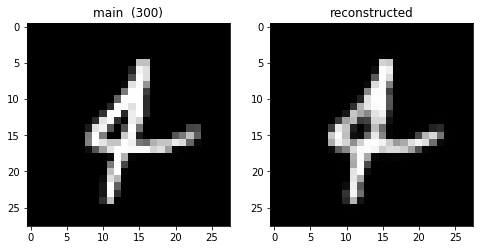

In [15]:
# Select a test image (for example, index 1001)
test_index = 300
test_image = x_test[test_index]  # Get the test image from the dataset

# Predict (reconstruct) the image using the autoencoder
reconstructed_image = autoencoder.predict(test_image.reshape(1, 28, 28, 1))  # Reshape and feed to model

# Create a figure with a specific size (8 inches by 4 inches)
plt.figure(figsize=(8, 4))

# Show the original image
plt.subplot(1, 2, 1)  # First subplot in a 1x2 grid
plt.imshow(test_image.squeeze(), cmap='gray')  # Remove single dimensions and use grayscale
plt.title(f"main  ({test_index})")  # Set title showing the index

# Show the reconstructed image
plt.subplot(1, 2, 2)  # Second subplot in a 1x2 grid
plt.imshow(reconstructed_image.squeeze(), cmap='gray')  # Remove single dimensions and use grayscale
plt.title("reconstructed")  # Title for reconstructed image

# Display the figure
plt.show()
